In [2]:
#useful: https://github.com/fusion-flap/flap
import sys
sys.path.append('E:\marci main\Fusion\flap_module\flap')

import flap


import glob
import os
from scipy import io
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os
import numpy as np
from scipy import signal
import copy
import time
import math

INIT flap storage


In [14]:
#dir(flap)

In [2]:
%%script false
import flap.testdata

flap.testdata.register()

length = 0.01
test1 = flap.get_data('TESTDATA', name='TEST-1-1', options={'Signal':'Sin','Length':length}, object_name='TEST-1-1')

#flap.list_data_objects('TEST-1-1')
#flap.list_data_objects(test1)
test1.plot()

Couldn't find program: 'false'


In [3]:
path ='E:\\marci main\\Fusion\\inputdata\\in\\'#pc
#path ='C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\in\\'#laptop

for filename in glob.glob(os.path.join(path, '*.sav')):
    loaded_sav = io.readsav(filename, python_dict = True)
    print('Loaded: '+filename)
    print('\n')
    
for i in range(loaded_sav["channels"].size):
    tmp = str(loaded_sav["channels"][i])
    loaded_sav["channels"][i] = tmp[2:-1]

print(loaded_sav["channels"])

Loaded: E:\marci main\Fusion\inputdata\in\AUGD_32326_MHA.sav


['MHA-B31-14' 'MHA-B31-03' 'MHA-B31-01' 'MHA-B31-02' 'MHA-B31-12'
 'MHA-B31-13' 'MHA-C04-01' 'MHA-C09-01_' 'MHA-B31-11' 'MHA-B31-10'
 'MHA-B31-09' 'MHA-B31-08' 'MHA-B31-07' 'MHA-B31-06' 'MHA-B31-05'
 'MHA-B31-30' 'MHA-C39-01' 'MHA-C09-26' 'MHA-C09-01' 'MHA-C09-02'
 'MHA-C09-03' 'MHA-C09-04' 'MHA-C09-05' 'MHA-C09-06']


In [4]:
#%%script false
print(list(loaded_sav))
print(loaded_sav["channels"])

['expname', 'shotnumber', 'channels', 'data', 'timeax', 'theta', 'phi', 'data_history', 'coord_history']
['MHA-B31-14' 'MHA-B31-03' 'MHA-B31-01' 'MHA-B31-02' 'MHA-B31-12'
 'MHA-B31-13' 'MHA-C04-01' 'MHA-C09-01_' 'MHA-B31-11' 'MHA-B31-10'
 'MHA-B31-09' 'MHA-B31-08' 'MHA-B31-07' 'MHA-B31-06' 'MHA-B31-05'
 'MHA-B31-30' 'MHA-C39-01' 'MHA-C09-26' 'MHA-C09-01' 'MHA-C09-02'
 'MHA-C09-03' 'MHA-C09-04' 'MHA-C09-05' 'MHA-C09-06']


In [ ]:
print(loaded_sav["timeax"])
time_ax = flap.Coordinate(name="Time",
                          unit="s",
                          mode = flap.CoordinateMode(equidistant=True),
                          start=0.85,  #loaded_sav["timeax"][0],
                          step=0.000005,  #loaded_sav["timeax"][1]-loaded_sav["timeax"][0],
                          #values=loaded_sav["timeax"]
                          dimension_list=[0]
                         )#
#time_ax.name = "Time"
#time_ax.unit = "s"
#time_ax.values = sav1["timeax"]

print(time_ax)
print(time_ax.unit.name)
print(time_ax.start)

In [22]:
channel_name = flap.Coordinate(name="Channels",
                          unit=None,
                          mode = flap.CoordinateMode(equidistant=False),
                          values=loaded_sav["channels"],
                          dimension_list=[1]
                         )

channel_no = flap.Coordinate(name="Channel no",
                          unit="no",
                          mode = flap.CoordinateMode(equidistant=True),
                          start=1,
                          step=1,
                          dimension_list=[1]
                         )
print(channel_name.values)

['MHA-B31-14' 'MHA-B31-03' 'MHA-B31-01' 'MHA-B31-02' 'MHA-B31-12'
 'MHA-B31-13' 'MHA-C04-01' 'MHA-C09-01_' 'MHA-B31-11' 'MHA-B31-10'
 'MHA-B31-09' 'MHA-B31-08' 'MHA-B31-07' 'MHA-B31-06' 'MHA-B31-05'
 'MHA-B31-30' 'MHA-C39-01' 'MHA-C09-26' 'MHA-C09-01' 'MHA-C09-02'
 'MHA-C09-03' 'MHA-C09-04' 'MHA-C09-05' 'MHA-C09-06']


In [31]:
flap_object= flap.DataObject(
                      data_array = loaded_sav['data'],
                      data_unit = flap.Unit(name= 'voltage', unit= 'volt'),
                      exp_id = 0, #str(loaded_sav['expname'])[2:-1],
                      coordinates = [time_ax,channel_no]
                     )

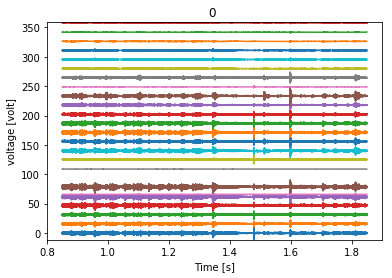

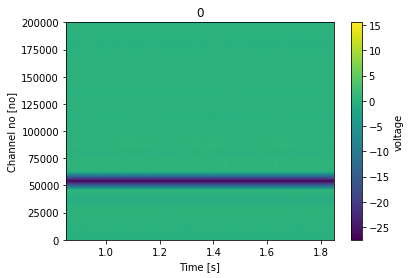

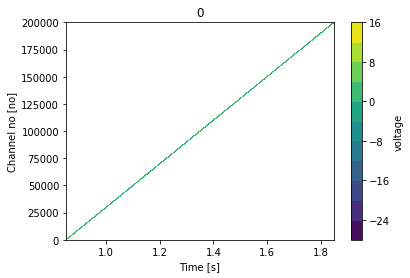

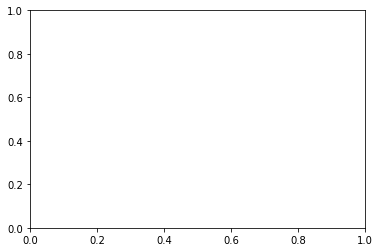

In [32]:
flap_object.plot(plot_type = 'multi xy')
flap_object.plot(plot_type = 'image')
flap_object.plot(plot_type = 'contour')

In [29]:
flap.slice_data(flap_object, slicing={'Channels': 'MHA-C09-04'}, 
                options = {'Slice type': 'Simple'})

ValueError: Cannot add strings.

In [14]:
flap.list_data_objects()

''

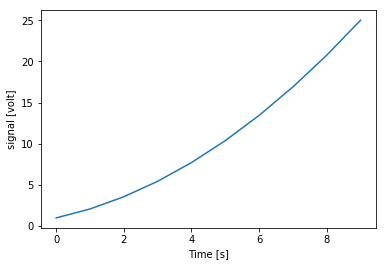

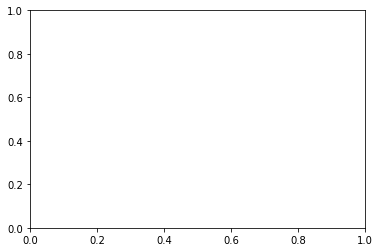

In [9]:
time_dummy = flap.Coordinate(name="Time",
                          unit="s",
                          mode = flap.CoordinateMode(equidistant=True),
                          start=0,
                          step=1,
                          #values=np.linspace(1,5,10)
                          dimension_list=[0]
                         )

#value_dummy = flap.Coordinate(name="Signal",
#                          unit="V",
#                          mode = flap.CoordinateMode(equidistant=True),
#                          start=0,
#                          step=1,
#                          #values=np.linspace(1,5,10)
#                         )

dummy= flap.DataObject(data_array = np.linspace(1,5,10)**2,
                       data_unit = flap.Unit(name = "signal",unit = "volt"),#
                       coordinates = time_dummy,  #,value_dummy]
                     )

dummy.plot()#plot_type = 'scatter'
#plot_2 = flap.plot('dummy',slicing={'Time':[1,3]})

In [17]:
%%script false

Használtunk fent egy flap.testdata.register()-t, és utána működött minden.

def register(data_source=None):
    if (data_source is None):
        data_source = 'TESTDATA'
    flap.register_data_source('TESTDATA',
                          get_data_func=testdata_get_data,
                          add_coord_func=add_coordinate)
    
User manual:
Writing a data source module
A data source module differs from a normal Python module in the in that it can provide a
few functions for the FLAP framework.

Ez nekünk egyenlőre nem feltétlenül kell, mert nem kívülről a flap-be akarunk bevinni dolgokat,
hanem kívülről kívülre(nti wavelet), csak épp eközban flap-be legyen. De fontos: 


Couldn't find program: 'false'
